### PROJECT NO-02

### laod dataset (IRIS) & save in csv file

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Add species names
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

# Save to CSV
df.to_csv("../Week 2/iris_dataset.csv", index=False)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


### inspect & clean data

In [3]:
# Basic inspection
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# (No missing values in Iris, but this is how you'd clean)
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.

### Basic statistic analysis

In [4]:
stats = df.describe().loc[["mean", "min", "max"]]
print(stats)


      sepal length (cm)  sepal width (cm)  petal length (cm)  \
mean           5.843333          3.057333              3.758   
min            4.300000          2.000000              1.000   
max            7.900000          4.400000              6.900   

      petal width (cm)  target  
mean          1.199333     1.0  
min           0.100000     0.0  
max           2.500000     2.0  


### identify trends / key insights

In [5]:
# Group by species and calculate mean values
species_means = df.groupby("species").mean(numeric_only=True)
print(species_means)


            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  target  
species                               
setosa                 0.246     0.0  
versicolor             1.326     1.0  
virginica              2.026     2.0  


**Observation (from code output):**

. Setosa has much smaller petal length & width

. Virginica has the largest petals

. Petal features separate species better than sepal features

### visualization (meaningfull plot)

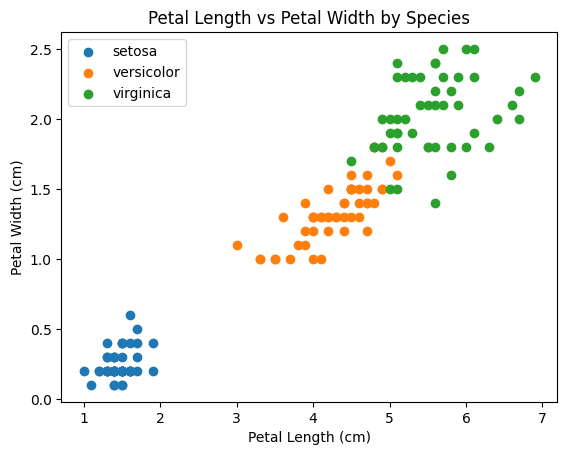

In [7]:
import matplotlib.pyplot as plt

# Scatter plot: Petal Length vs Petal Width
for species in df["species"].unique():
    subset = df[df["species"] == species]
    plt.scatter(subset["petal length (cm)"], subset["petal width (cm)"], label=species)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width by Species")
plt.legend()
plt.show()


**6. Findings (Simple Words)**

The Iris dataset contains 150 flower samples from 3 species

Petal length and petal width clearly separate the species

Setosa flowers are easy to identify because their petals are much smaller

Versicolor and Virginica are closer, but Virginica usually has larger petals

Sepal measurements are less effective for classification than petal measurements